In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(img_train, value_train), (img_test, value_test) = tf.keras.datasets.mnist.load_data()
img_train = img_train/255.0
img_test = img_test/255.0

60000 10000


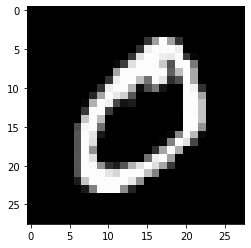

In [3]:
print(len(img_train), len(img_test))
plt.imshow(img_train[1], cmap=plt.cm.gray)

In [4]:
neural_network = tf.keras.models.Sequential()
neural_network.add(tf.keras.layers.Flatten(input_shape=(28, 28, 1)))
neural_network.add(tf.keras.layers.Dense(128, activation='relu'))
neural_network.add(tf.keras.layers.Dense(128, activation='relu'))
neural_network.add(tf.keras.layers.Dense(10, activation='softmax'))
neural_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [5]:
neural_network.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
neural_network.fit(img_train, value_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2272 - accuracy: 0.9330
Epoch 2/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0963 - accuracy: 0.9702
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0693 - accuracy: 0.9779


In [6]:
loss, accuracy = neural_network.evaluate(img_test, value_test)
print(f'loss: {loss}, accuracy: {accuracy}')
results = neural_network.predict([img_test])

313/313 [==============================] - 1s 2ms/step - loss: 0.0939 - accuracy: 0.9714
loss: 0.09389935433864594, accuracy: 0.9714000225067139
313/313 [==============================] - 1s 1ms/step


Is it 4?


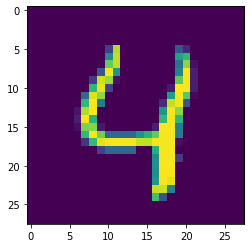

In [31]:
result_number = np.random.randint(100, size=1)[0]
print(f'Is it {np.argmax(results[result_number])}?')
plt.imshow(img_test[result_number])
plt.show()